<h2 align='center' style='color:purple'>Outlier detection and removal using z-score and standard deviation in python pandas</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6, 4)

In [5]:
df = pd.read_csv('heights.csv')
df.sample(5)

,gender,height
4516,Male,66.296423
7777,Female,61.079452
9540,Female,62.678696
2115,Male,70.094117
4929,Male,68.554097


In [6]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


**Plot bell curve along with histogram for our dataset**

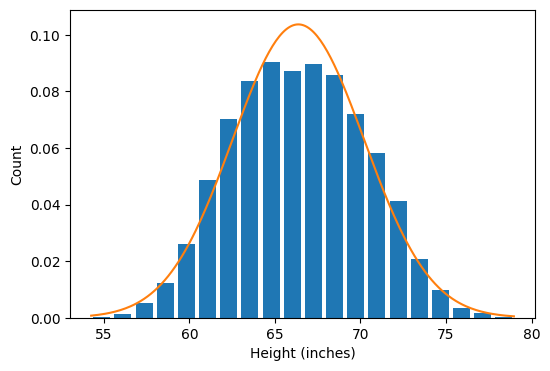

In [4]:
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

<h3 style='color:blue'>(1) Outlier detection and removal using 3 standard deviation</h3>

In [7]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [8]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392479274

In [9]:
df[(df.height < lower_limit) | (df.height > upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [10]:
df_no_outlier_std_dev = df[(df.height > lower_limit) & (df.height < upper_limit)]
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

<h3 style='color:blue'>(2) Outlier detection and removal using Z Score</h3>

In [11]:
df['zscore'] = (df.height - df.height.mean()) / df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [12]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [13]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [14]:
df.shape[0] - df_no_outliers.shape[0]

7